In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def save_fig(_id, tight_layout=True, resolution=300):
    path = os.path.join("output/combined_cascade", _id + ".png")
    print("Saving figure", _id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=resolution)


In [3]:
#loading user data and getting number of stages

user_data=pd.read_csv('input/user_data.csv')
n_stages=user_data.iloc[0,1]
user_data

variables  values
0                                   Number of stages      21
1                          month for initial storage       3
2                            day for initial storage      31
3  nuber of rows from begening of USACE forecsat ...       3
4   nuber of rows from End of USACE forecsat to drop       0
5                              number of small trees       7

In [4]:
params=pd.read_excel('input/Cascade_info.xlsx',sheet_name='plotting_info')
name=params['name']
name=sorted(name)
name

['BB', 'FP', 'FR', 'GA', 'GP', 'OH']

In [5]:
dir_list=os.listdir("output/solution_tree")
dir_list

['solution_tree_release.csv',
 'solution_tree_spill.csv',
 'solution_tree_storage.csv',
 'solution_tree_total_pflow.csv']

In [6]:
solution_tree_raw=[]
solution_tree=[]
for f in dir_list:
    temp=pd.read_csv(os.path.join('output/solution_tree',f),index_col=0)
    temp2=temp.copy()
    solution_tree_raw.append(temp2)
    temp['ave']=0
    temp['total']=0
    temp.iloc[:,-2]=temp.iloc[:,0:len(name)].mean(axis=1)
    temp.iloc[:,-1]=temp.iloc[:,0:len(name)].sum(axis=1)
    solution_tree.append(temp)

In [7]:
len(solution_tree)

4

In [8]:
solution_tree[0]

BB_out     FP_out     FR_out     GA_out  GP_out     OH_out  Node  \
0    78.941147  15.300000  37.647059  25.100000    36.0  51.822201     1   
1    50.205275  24.300000  33.190998  14.943089    36.0  50.205275     2   
2    53.322139  24.300000  35.900998  14.943089    36.0  53.322139     3   
3    43.053229  31.720890  32.400000  23.943089    36.0  43.053229     4   
4    37.897183  31.720890  33.360000  15.322066    36.0  54.600000     5   
..         ...        ...        ...        ...     ...        ...   ...   
311  25.379570  31.720890  28.235294  32.800000    36.0  45.939371   312   
312  27.501581  31.720890  35.580881  41.000000    36.0  27.501581   313   
313  14.876053  31.720890  33.350000  14.943089    36.0  14.876053   314   
314  54.600000  31.720890  30.480000  17.462059    36.0  54.600000   315   
315  54.600000  21.746575  26.506638  32.800000    36.0  54.600000   316   

     Parent      Prob  Stage  probability        ave       total  
0         0  1.000000      1         1.00  40.801734  244.810406  
1         1  0.680000      2         0.68  34.807439  208.844636  
2         1  0.320000      2         0.32  36.298061  217.788365  
3         2  0.647059      3         0.44  35.028406  210.170438  
4         2  0.352941      3         0.24  34.816690  208.900139  
..      ...       ...    ...          ...        ...         ...  
311     280  0.200000     21         0.02  33.345854  200.075125  
312     283  0.666667     21         0.04  33.217489  199.304934  
313     284  1.000000     21         0.02  24.294348  145.766086  
314     285  1.000000     21         0.02  37.477158  224.862949  
315     286  1.000000     21         0.02  37.708869  226.253213  

[316 rows x 13 columns]

In [9]:
solution_tree[0].loc[:,'ave']

0      40.801734
1      34.807439
2      36.298061
3      35.028406
4      34.816690
         ...    
311    33.345854
312    33.217489
313    24.294348
314    37.477158
315    37.708869
Name: ave, Length: 316, dtype: float64

In [10]:
var_dict={0:['Release',"KCFS"],1:["Spill","KCFS"],2:["Storage","MAF"],3:["Total Pflow","KCFS"],}

C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\2378444843.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\2378444843.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\2378444843.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Saving figure box_average_all_nodes


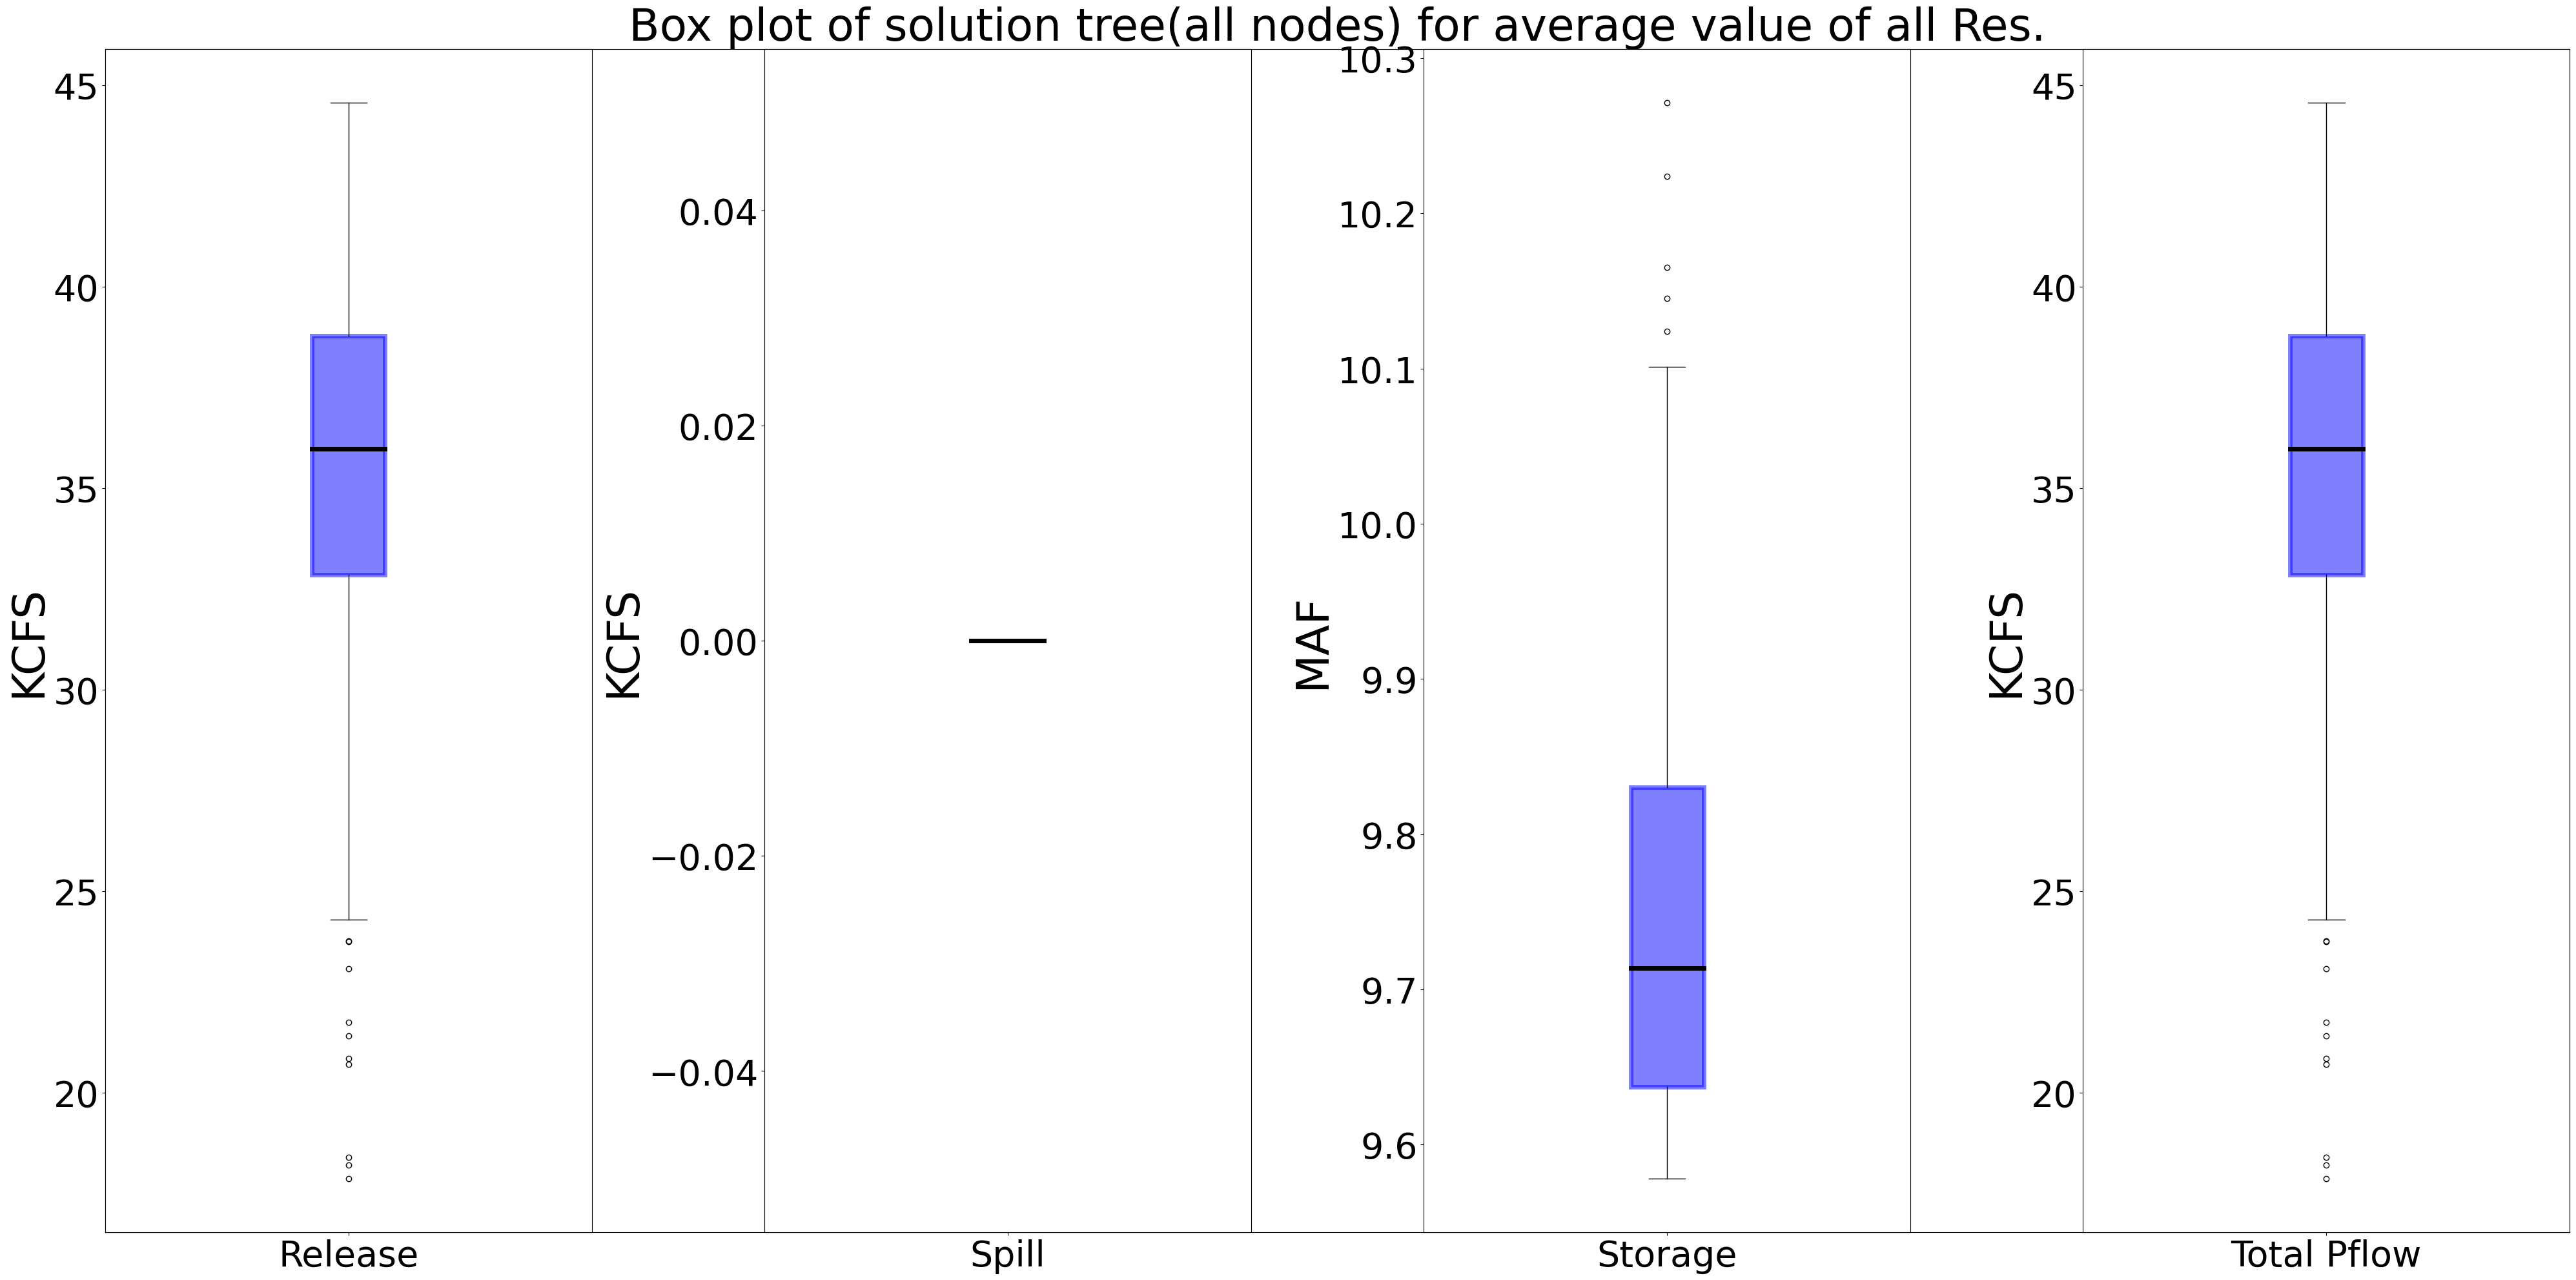

In [11]:
fig=plt.figure(figsize=(40,20))
plt.title("Box plot of solution tree(all nodes) for average value of all Res.",fontsize=50)
plt.xticks([])
plt.yticks([])
for i in range(len(solution_tree)):
    ax=fig.add_subplot(1,4,i+1,label=var_dict[i][0])
    ax.boxplot(solution_tree[i].loc[:,'ave'], patch_artist=True,
            boxprops=dict(facecolor='b', color='b',alpha=.5,linewidth=5),
            medianprops=dict(color='k',linewidth=5),
            )
    ax.set_xticklabels([var_dict[i][0]],fontsize=40)
    ax.tick_params(axis='y', which='major', labelsize=40)
    plt.ylabel(var_dict[i][1],fontsize=50)
    plt.tight_layout()
save_fig("box_average_all_nodes",False)

C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\160939978.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\160939978.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\160939978.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Saving figure box_total_all_nodes


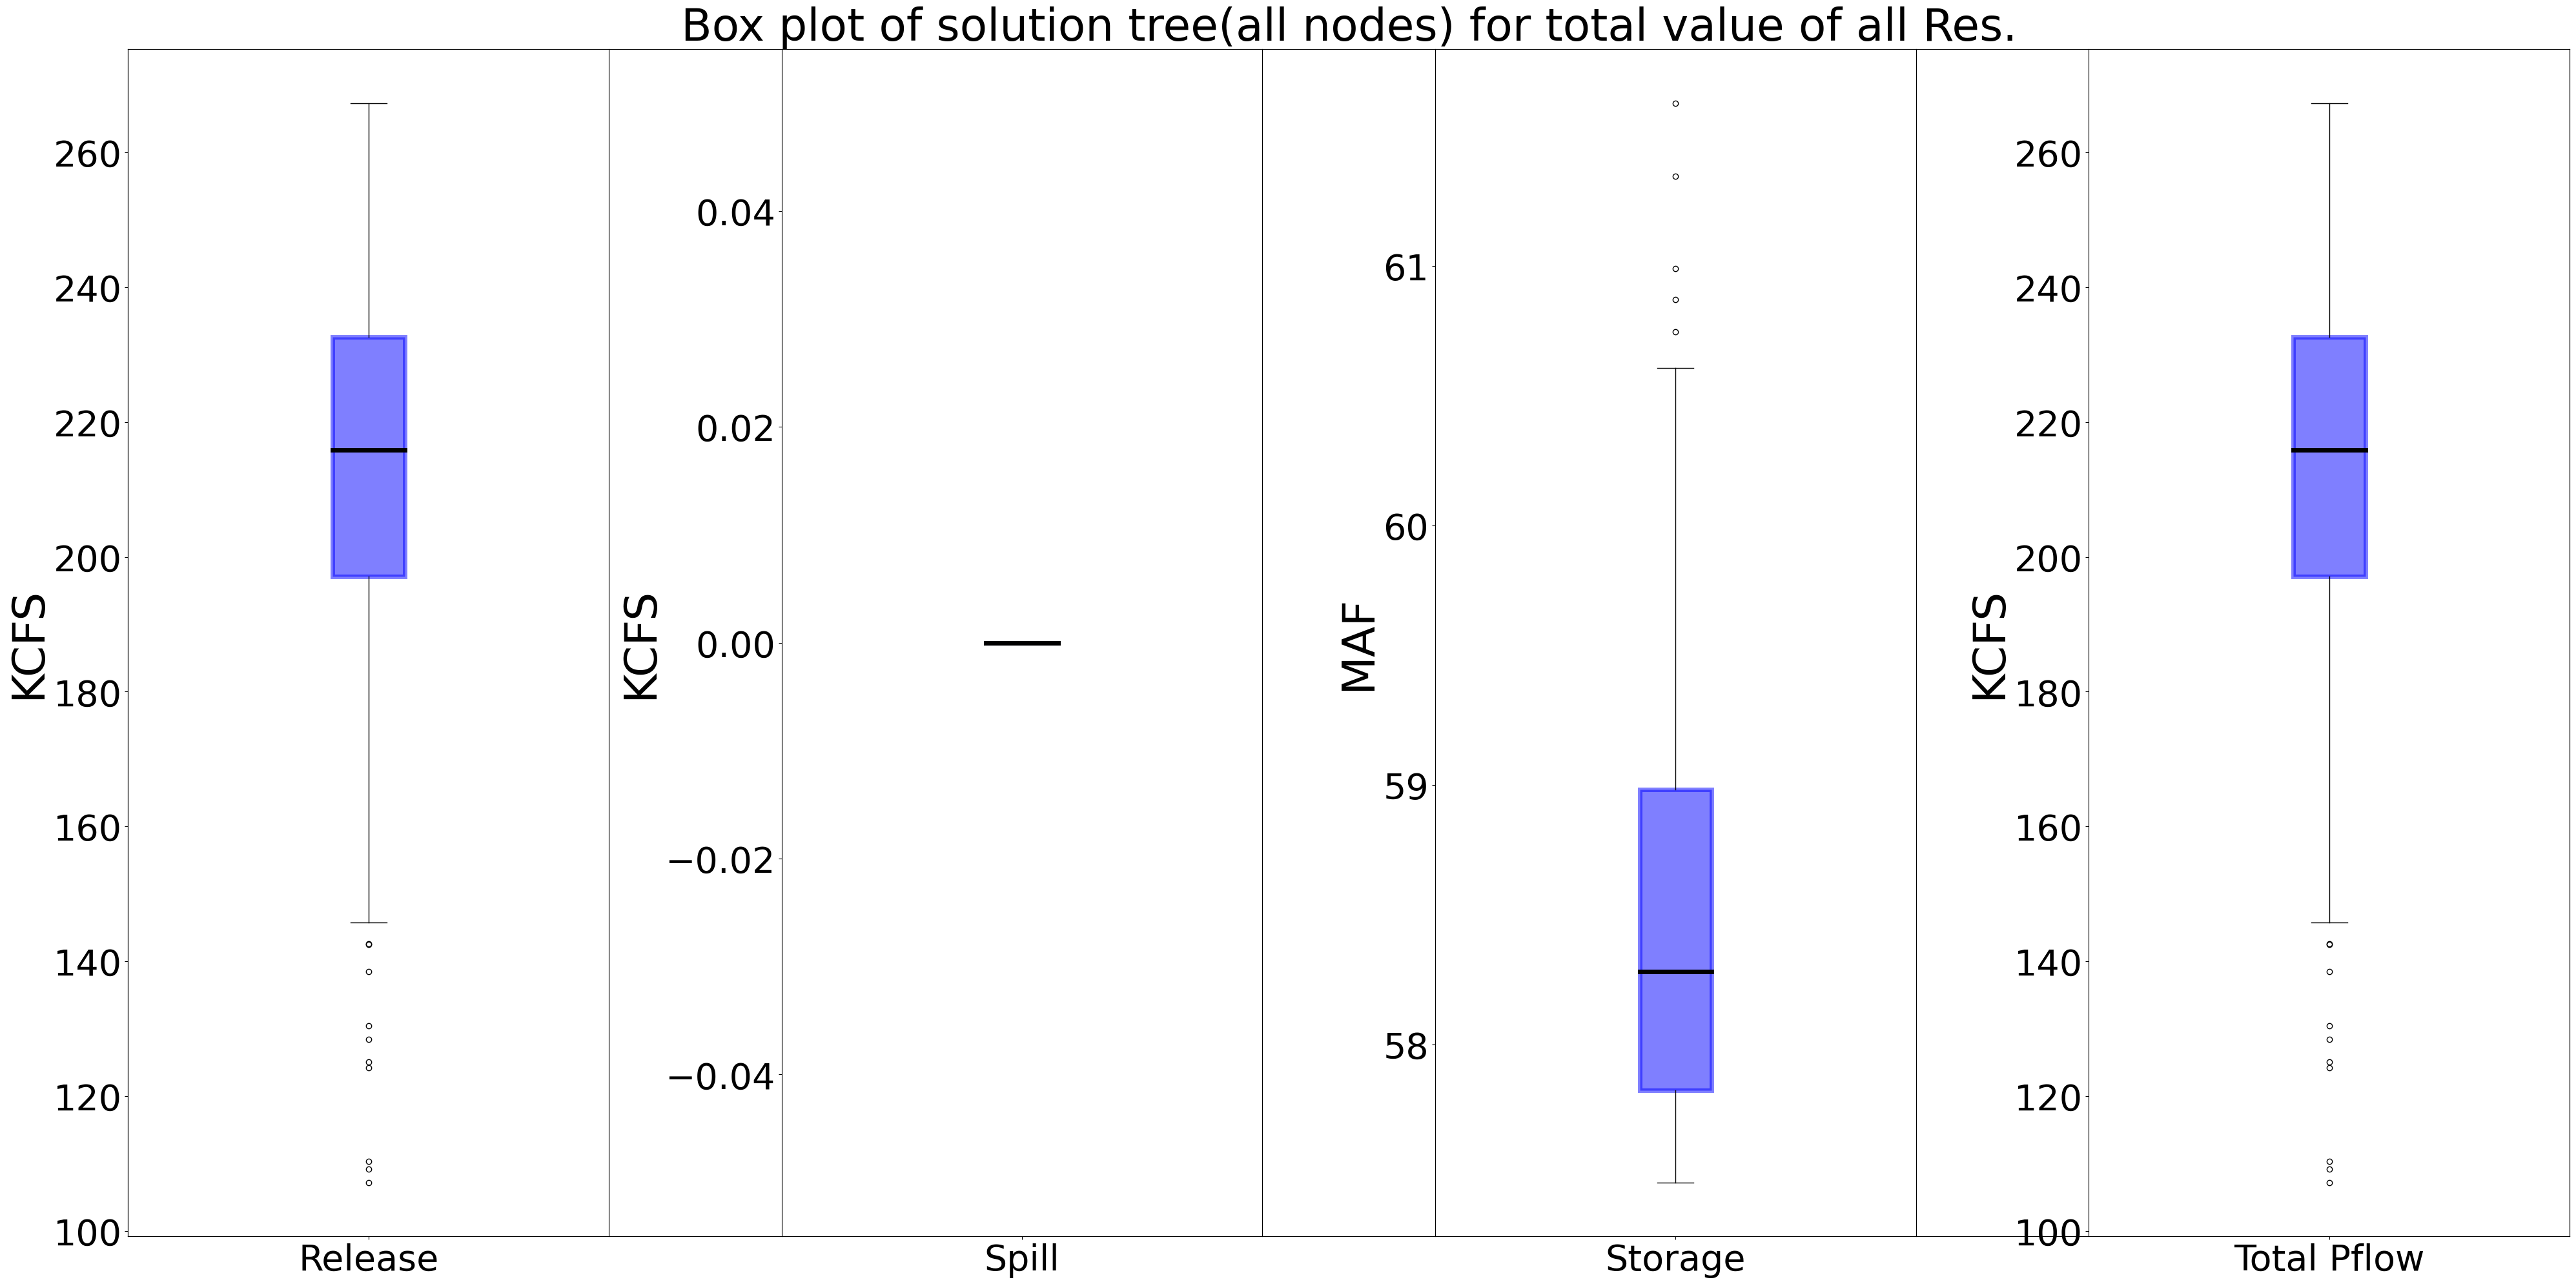

In [12]:
fig=plt.figure(figsize=(40,20))
plt.title("Box plot of solution tree(all nodes) for total value of all Res.",fontsize=50)
plt.xticks([])
plt.yticks([])
for i in range(len(solution_tree)):
    ax=fig.add_subplot(1,4,i+1,label=var_dict[i][0])
    plt.boxplot(solution_tree[i].loc[:,'total'], patch_artist=True,
            boxprops=dict(facecolor='b', color='b',alpha=.5,linewidth=5),
            medianprops=dict(color='k',linewidth=5),
            )
    ax.set_xticklabels([var_dict[i][0]],fontsize=40)
    ax.tick_params(axis='both', which='major', labelsize=40)
    plt.ylabel(var_dict[i][1],fontsize=50)
    plt.tight_layout()
save_fig("box_total_all_nodes",False)

In [13]:
g_mean,g_total=[],[]
for q in solution_tree_raw:
    g=q.groupby('Stage')
    mean=g.mean()
    mean['ave']=mean.iloc[:,0:len(name)].mean(axis=1)
    mean['total']=mean.iloc[:,0:len(name)].sum(axis=1)
    g_mean.append(mean)
    total=g.sum()
    total['ave']=total.iloc[:,0:len(name)].mean(axis=1)
    total['total']=total.iloc[:,0:len(name)].sum(axis=1)
    g_total.append(total)

In [14]:
g_mean[0]

BB_out     FP_out     FR_out     GA_out     GP_out     OH_out  \
Stage                                                                     
1      78.941147  15.300000  37.647059  25.100000  36.000000  51.822201   
2      51.763707  24.300000  34.545998  14.943089  36.000000  51.763707   
3      42.659715  31.720890  33.170000  21.069415  36.000000  48.027321   
4      51.855785  27.106164  30.420136  25.837444  36.000000  46.006938   
5      42.785964  31.233733  30.031794  23.228335  36.000000  43.248231   
6      43.959874  31.720890  30.014245  27.259204  34.197507  42.969395   
7      48.463017  31.720890  29.055928  32.033260  35.791118  47.047742   
8      46.323527  31.720890  30.293939  32.347734  35.790780  46.848539   
9      35.180787  31.720890  30.622664  32.618508  32.873821  45.353440   
10     54.754440  31.720890  34.386597  29.138967  36.000000  37.074482   
11     40.957566  31.720890  32.758254  22.311477  36.000000  36.030178   
12     40.067953  31.720890  31.426735  23.535586  36.000000  39.625178   
13     41.414830  31.720890  30.852709  21.694357  36.000000  41.170970   
14     52.530752  30.924838  29.549140  26.629632  36.000000  51.316772   
15     49.547487  31.578033  26.103020  30.123002  35.611249  51.295819   
16     32.246895  31.720890  33.349086  32.783870  34.528082  35.717450   
17     55.578704  30.482961  31.107740  27.476066  35.715979  51.899230   
18     51.228124  31.355890  30.564524  30.341074  36.000000  49.288712   
19     36.376206  31.720890  33.355266  25.384611  36.000000  39.421651   
20     35.217523  31.720890  32.431843  25.394625  36.000000  34.444403   
21     33.347596  31.388413  31.311674  24.864504  35.935333  32.957657   

        Node      Parent      Prob  probability        ave       total  
Stage                                                                   
1        1.0    0.000000  1.000000     1.000000  40.801734  244.810406  
2        2.5    1.000000  0.500000     0.500000  35.552750  213.316501  
3        5.0    2.333333  0.666667     0.333333  35.441224  212.647342  
4        9.0    5.200000  0.600000     0.200000  36.204411  217.226467  
5       14.5    9.166667  0.833333     0.166667  34.421343  206.528058  
6       21.5   14.250000  0.750000     0.125000  35.020186  210.121115  
7       30.0   21.333333  0.888889     0.111111  37.351993  224.111956  
8       40.0   30.363636  0.818182     0.090909  37.220902  223.325411  
9       51.5   40.250000  0.916667     0.083333  34.728352  208.370111  
10      64.5   51.285714  0.857143     0.071429  37.179229  223.075376  
11      79.0   64.800000  0.933333     0.066667  33.296394  199.778366  
12      94.5   78.875000  0.937500     0.062500  33.729391  202.376343  
13     111.5   94.722222  0.888889     0.055556  33.808959  202.853756  
14     130.0  111.789474  0.947368     0.052632  37.825189  226.951134  
15     150.0  130.571429  0.904762     0.047619  37.376435  224.258611  
16     171.5  149.909091  0.954545     0.045455  33.391045  200.346273  
17     194.5  171.291667  0.916667     0.041667  38.710114  232.260681  
18     219.0  194.840000  0.960000     0.040000  38.129721  228.778323  
19     245.0  219.296296  0.925926     0.037037  33.709771  202.258626  
20     272.5  244.964286  0.964286     0.035714  32.534881  195.209285  
21     301.5  273.100000  0.933333     0.033333  31.634196  189.805178

C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\697011176.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\697011176.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\697011176.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Saving figure box_stage_averaged_averaged


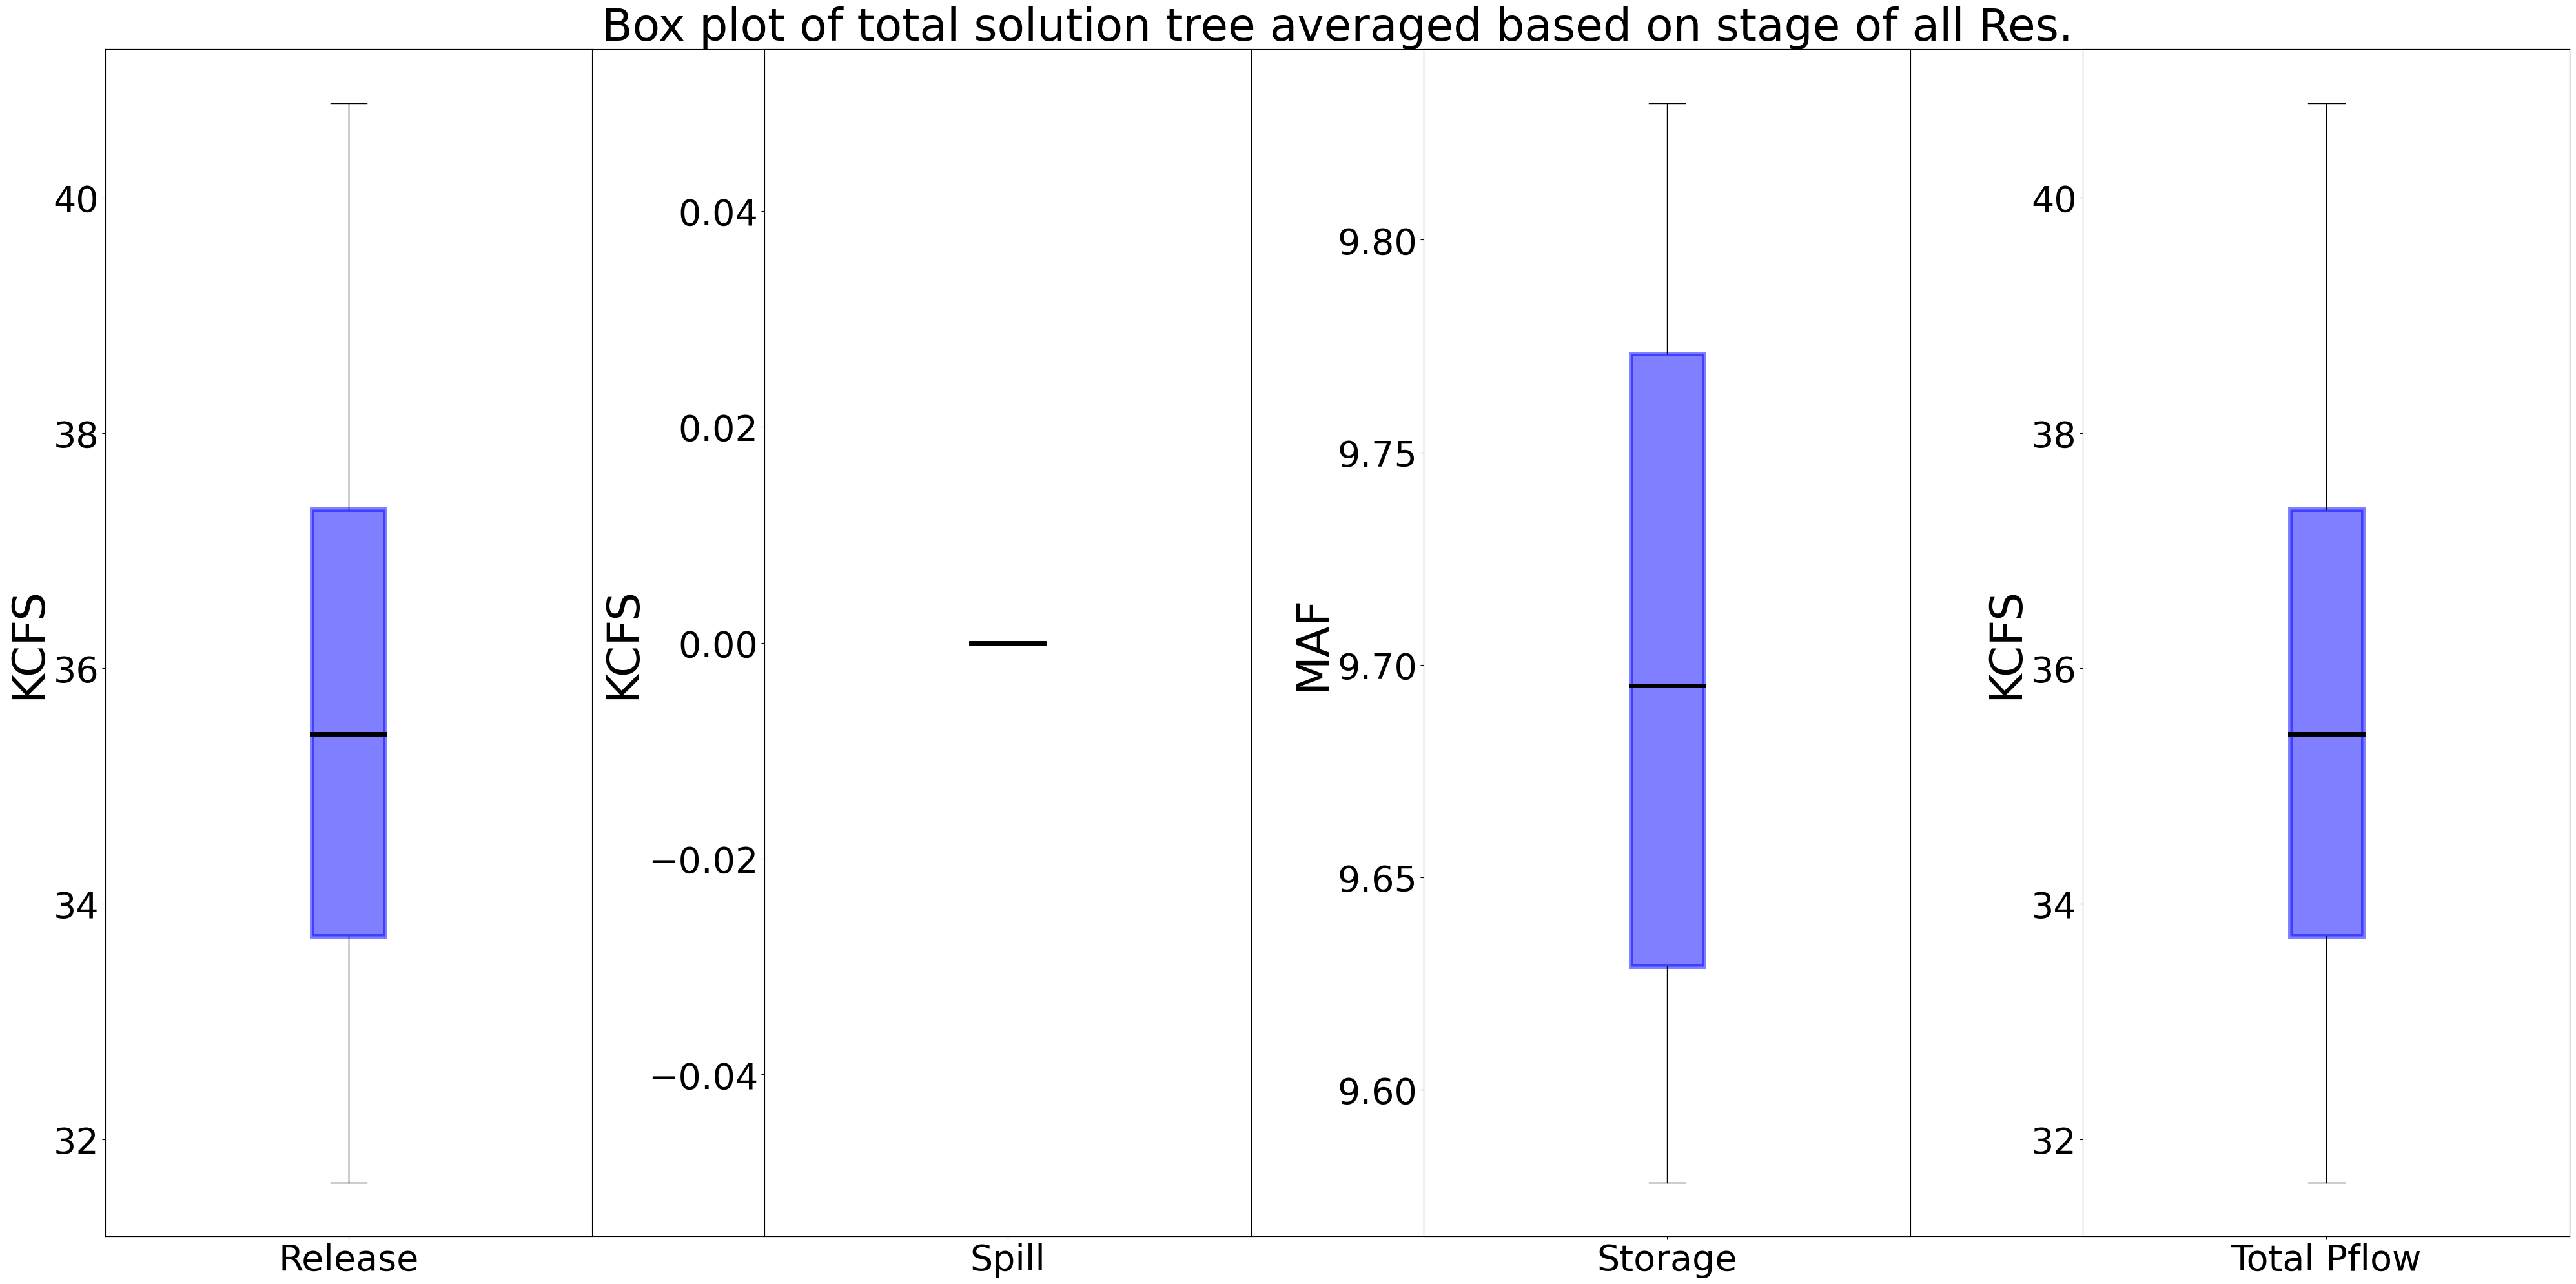

In [15]:
fig=plt.figure(figsize=(40,20))
plt.title("Box plot of total solution tree averaged based on stage of all Res.",fontsize=50)
plt.xticks([])
plt.yticks([])
for i in range(len(solution_tree)):
#     plt.subplot(1,4,i+1)
    ax=fig.add_subplot(1,4,i+1,label=var_dict[i][0])
    plt.boxplot(g_mean[i].loc[:,'ave'], patch_artist=True,
            boxprops=dict(facecolor='b', color='b',alpha=.5,linewidth=5),
            medianprops=dict(color='k',linewidth=5),
            )
    ax.set_xticklabels([var_dict[i][0]],fontsize=40)
    ax.tick_params(axis='both', which='major', labelsize=40)
    plt.ylabel(var_dict[i][1],fontsize=50)
    plt.tight_layout()
save_fig("box_stage_averaged_averaged",False)

C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\3437388222.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\3437388222.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\3437388222.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Saving figure box_stage_averaged_total


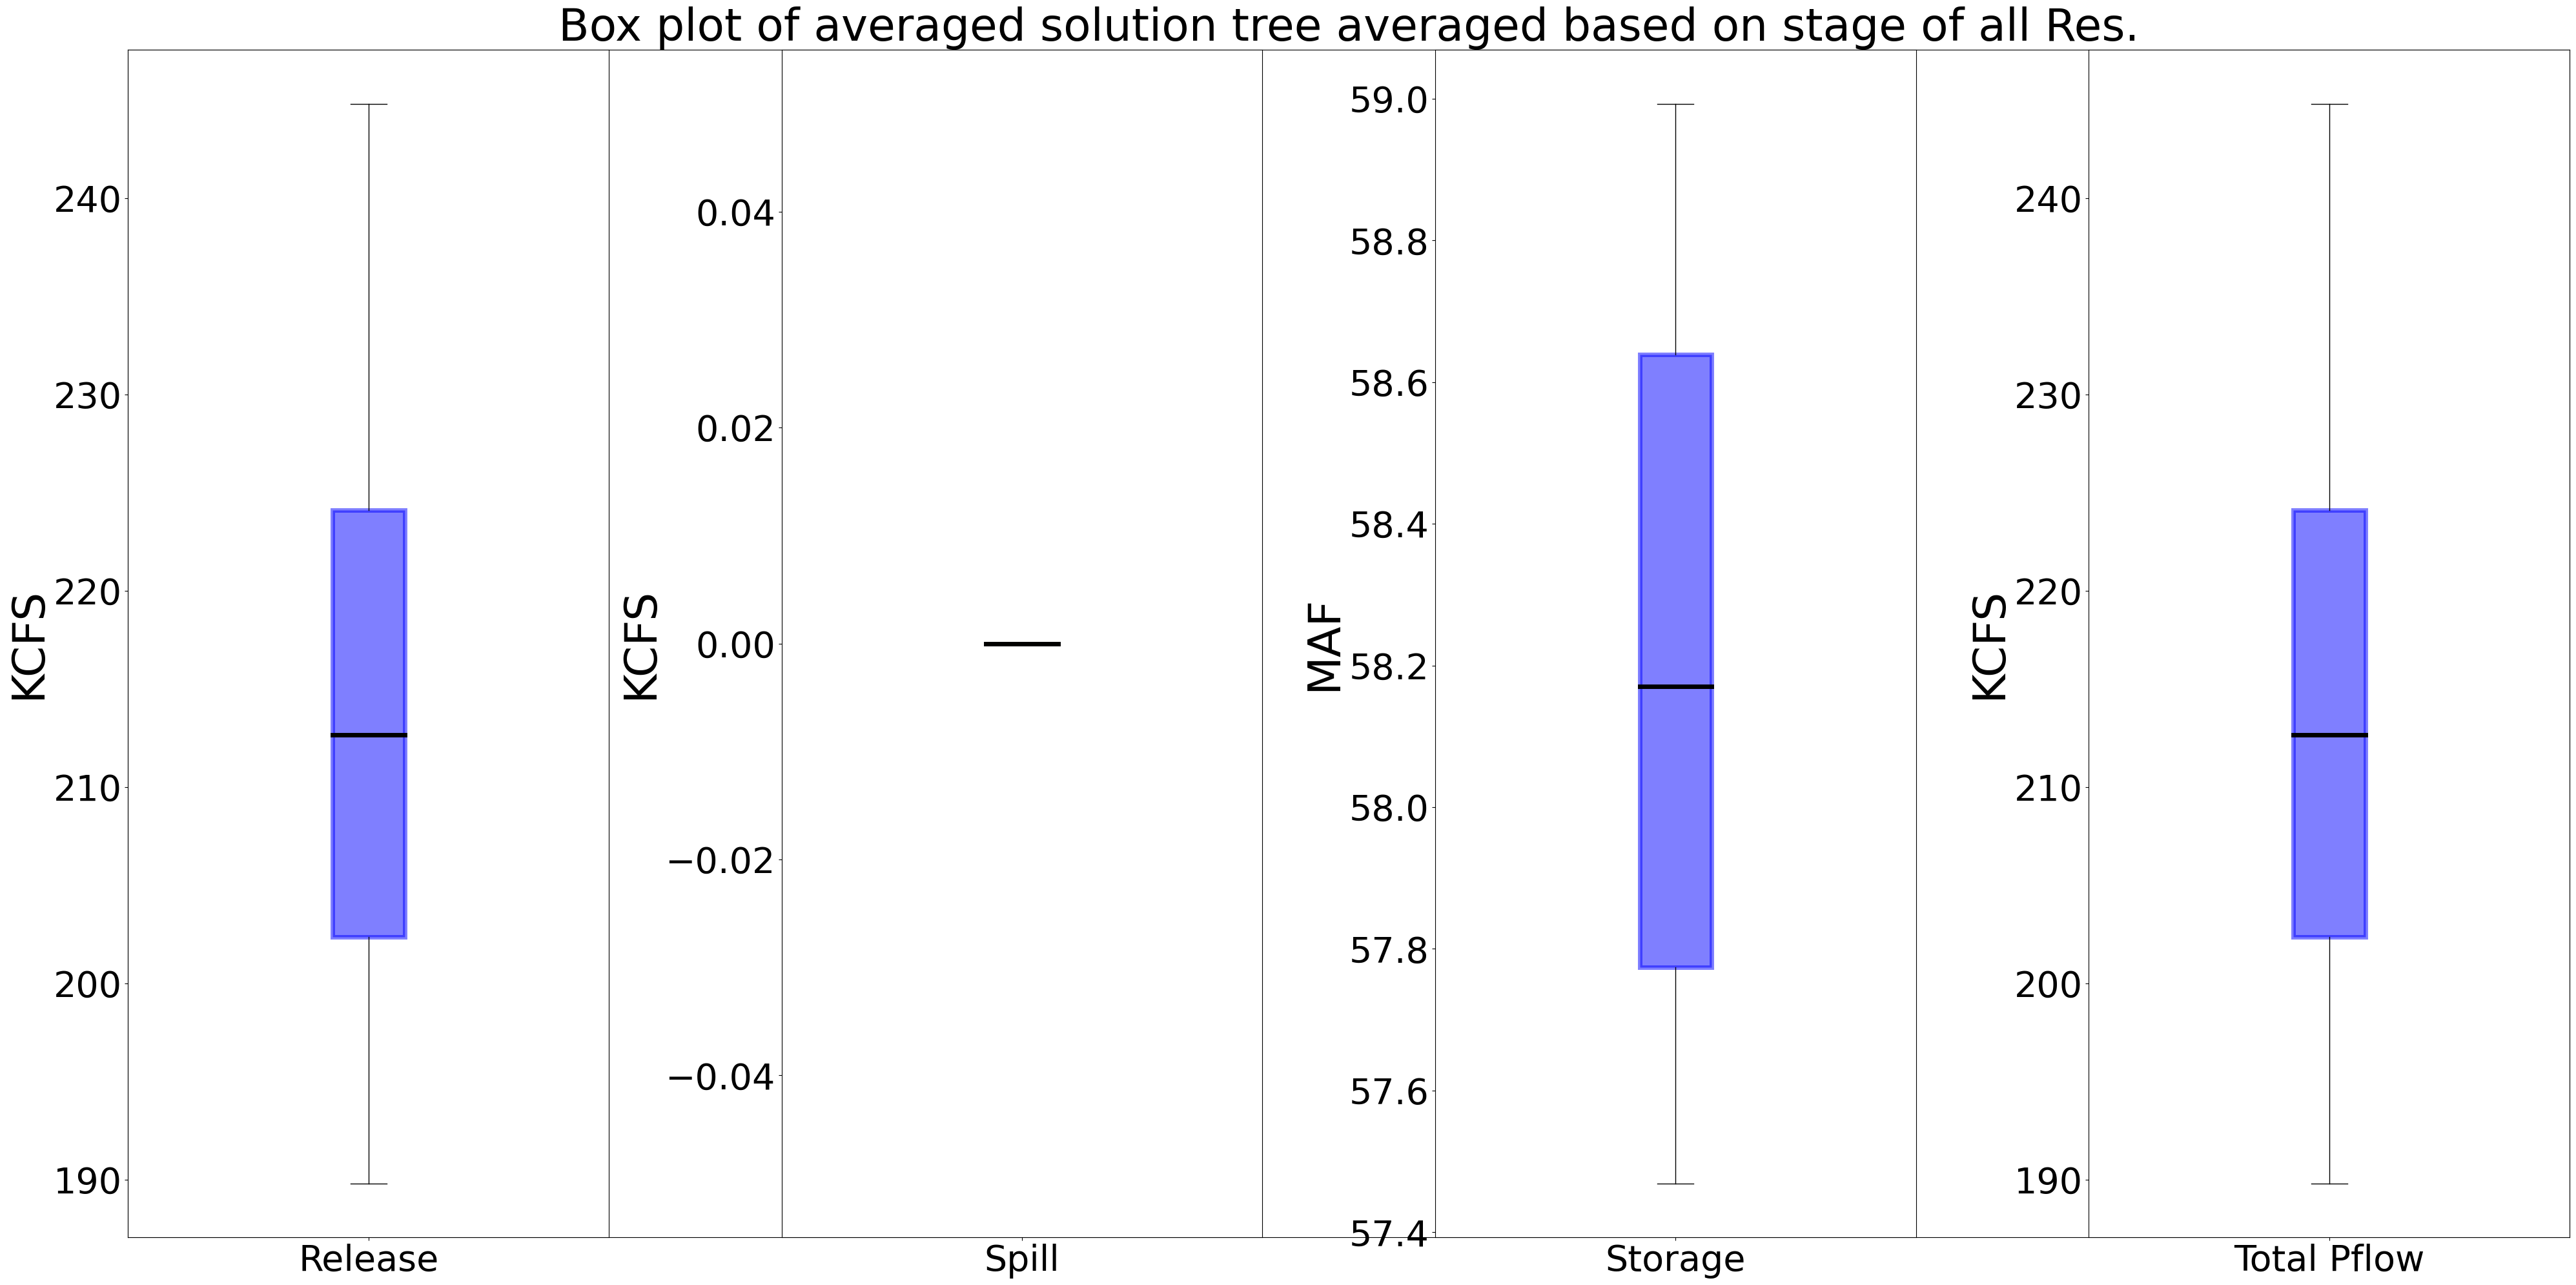

In [16]:
fig=plt.figure(figsize=(40,20))
plt.title("Box plot of averaged solution tree averaged based on stage of all Res.",fontsize=50)
plt.xticks([])
plt.yticks([])
for i in range(len(solution_tree)):
#     plt.subplot(1,4,i+1)
    ax=fig.add_subplot(1,4,i+1,label=var_dict[i][0])
    plt.boxplot(g_mean[i].loc[:,'total'], patch_artist=True,
            boxprops=dict(facecolor='b', color='b',alpha=.5,linewidth=5),
            medianprops=dict(color='k',linewidth=5),
            )
    ax.set_xticklabels([var_dict[i][0]],fontsize=40)
    ax.tick_params(axis='both', which='major', labelsize=40)
    plt.ylabel(var_dict[i][1],fontsize=50)
    plt.tight_layout()
save_fig("box_stage_averaged_total",False)

In [17]:
g_total[0]

BB_out      FP_out      FR_out      GA_out       GP_out  \
Stage                                                                 
1        78.941147   15.300000   37.647059   25.100000    36.000000   
2       103.527413   48.600000   69.091995   29.886179    72.000000   
3       127.979146   95.162671   99.510000   63.208245   108.000000   
4       259.278924  135.530822  152.100678  129.187221   180.000000   
5       256.715787  187.402397  180.190766  139.370011   216.000000   
6       351.678989  253.767123  240.113963  218.073628   273.580057   
7       436.167156  285.488014  261.503349  288.299340   322.120062   
8       509.558802  348.929795  333.233334  355.825074   393.698584   
9       422.169441  380.650685  367.471972  391.422095   394.485853   
10      766.562158  444.092466  481.412353  407.945531   504.000000   
11      614.363496  475.813356  491.373816  334.672158   540.000000   
12      641.087255  507.534247  502.827767  376.569380   576.000000   
13      745.466934  570.976027  555.348756  390.498432   648.000000   
14      998.084281  587.571918  561.433669  505.963004   684.000000   
15     1040.497229  663.138699  548.163420  632.583051   747.836224   
16      709.431691  697.859589  733.679891  721.245130   759.617806   
17     1333.888904  731.591063  746.585767  659.425591   857.183503   
18     1280.703091  783.897260  764.113098  758.526846   900.000000   
19      982.157572  856.464041  900.592194  685.384501   972.000000   
20      986.090656  888.184932  908.091605  711.049496  1008.000000   
21     1000.427873  941.652397  939.350231  745.935126  1078.059997   

            OH_out  Node  Parent  Prob  probability         ave        total  
Stage                                                                         
1        51.822201     1       0   1.0          1.0   40.801734   244.810406  
2       103.527413     5       2   1.0          1.0   71.105500   426.633001  
3       144.081964    15       7   2.0          1.0  106.323671   637.942026  
4       230.034689    45      26   3.0          1.0  181.022056  1086.132334  
5       259.489386    87      55   5.0          1.0  206.528058  1239.168347  
6       343.755161   172     114   6.0          1.0  280.161487  1680.968922  
7       423.429682   270     192   8.0          1.0  336.167934  2017.007602  
8       515.333933   440     334   9.0          1.0  409.429920  2456.579522  
9       544.241285   618     483  11.0          1.0  416.740222  2500.441330  
10      519.042749   903     718  12.0          1.0  520.509210  3123.055257  
11      540.452669  1185     972  14.0          1.0  499.445916  2996.675496  
12      634.002840  1512    1262  15.0          1.0  539.670248  3238.021489  
13      741.077462  2007    1705  16.0          1.0  608.561269  3651.367612  
14      975.018674  2470    2124  18.0          1.0  718.678591  4312.071546  
15     1077.212199  3150    2742  19.0          1.0  784.905137  4709.430821  
16      785.783890  3773    3298  21.0          1.0  734.603000  4407.617997  
17     1245.581527  4668    4111  22.0          1.0  929.042726  5574.256355  
18     1232.217792  5475    4871  24.0          1.0  953.243015  5719.458087  
19     1064.384587  6615    5921  25.0          1.0  910.163816  5460.982895  
20      964.443281  7630    6859  27.0          1.0  910.976662  5465.859970  
21      988.729705  9045    8193  28.0          1.0  949.025888  5694.155329

C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\4214868229.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\4214868229.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\4214868229.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Saving figure box_stage_summed_averaged


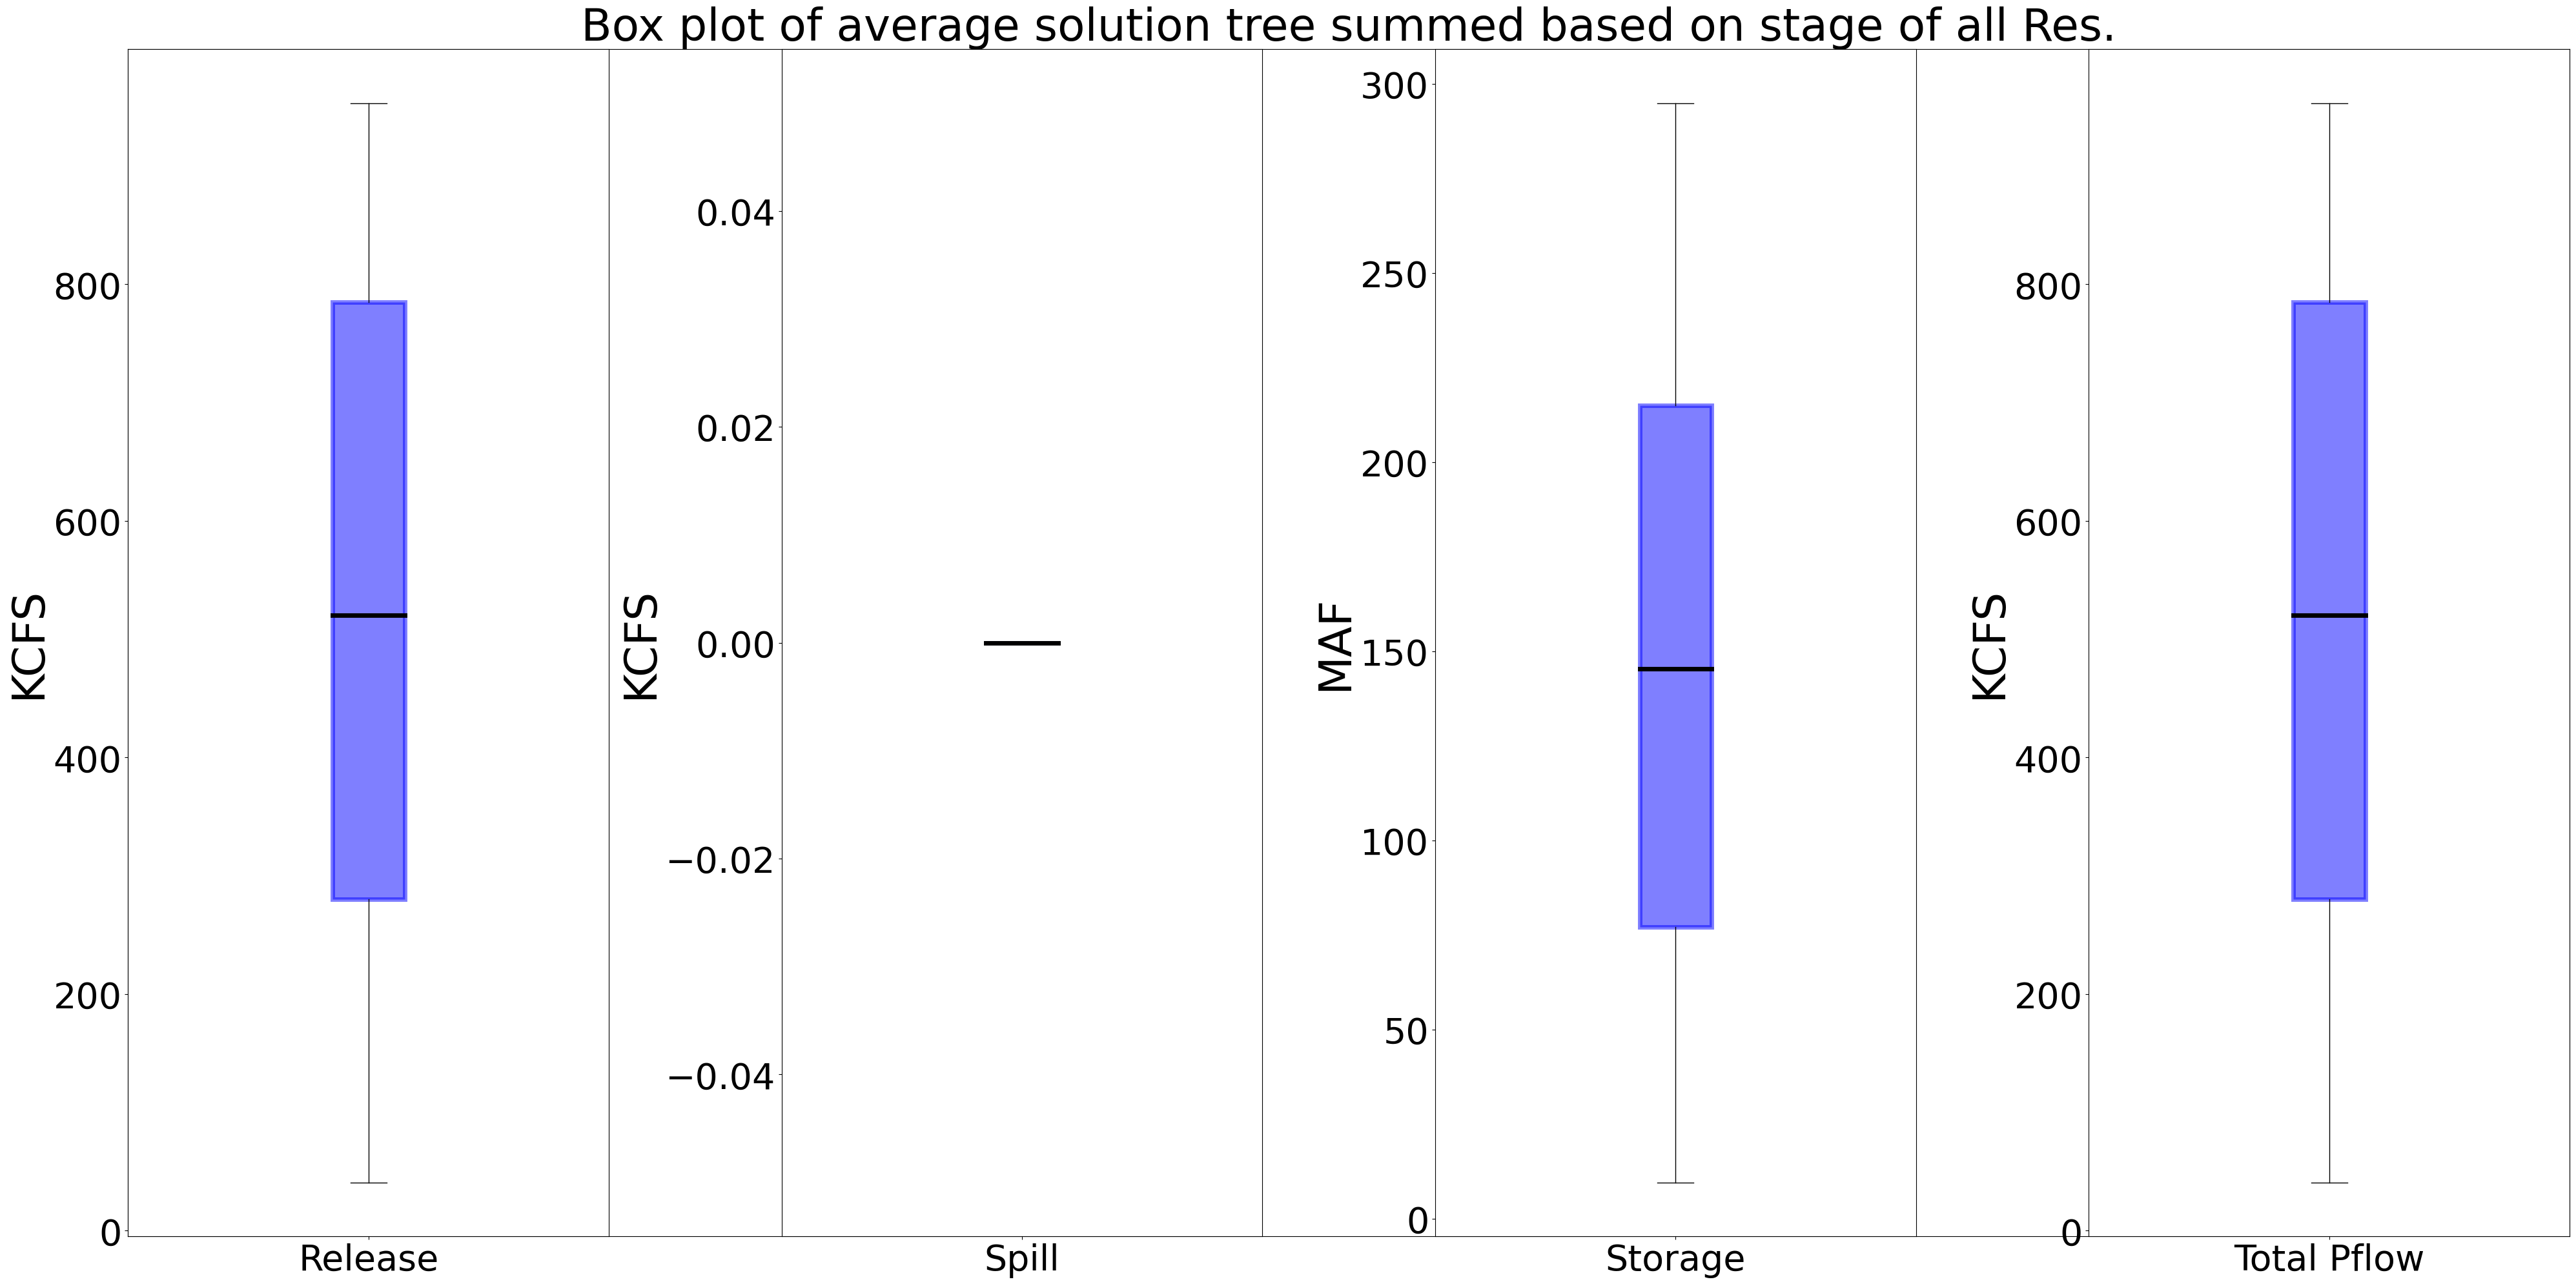

In [18]:
fig=plt.figure(figsize=(40,20))
plt.title("Box plot of average solution tree summed based on stage of all Res.",fontsize=50)
plt.xticks([])
plt.yticks([])
for i in range(len(solution_tree)):
#     plt.subplot(1,4,i+1)
    ax=fig.add_subplot(1,4,i+1,label=var_dict[i][0])
    plt.boxplot(g_total[i].loc[:,'ave'], patch_artist=True,
            boxprops=dict(facecolor='b', color='b',alpha=.5,linewidth=5),
            medianprops=dict(color='k',linewidth=5),
            )
    ax.set_xticklabels([var_dict[i][0]],fontsize=40)
    ax.tick_params(axis='both', which='major', labelsize=40)
    plt.ylabel(var_dict[i][1],fontsize=50)
    plt.tight_layout()
save_fig("box_stage_summed_averaged",False)

C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\1344651908.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\1344651908.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\chrs-164-ip\AppData\Local\Temp\ipykernel_9184\1344651908.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Saving figure box_stage_summed_summed


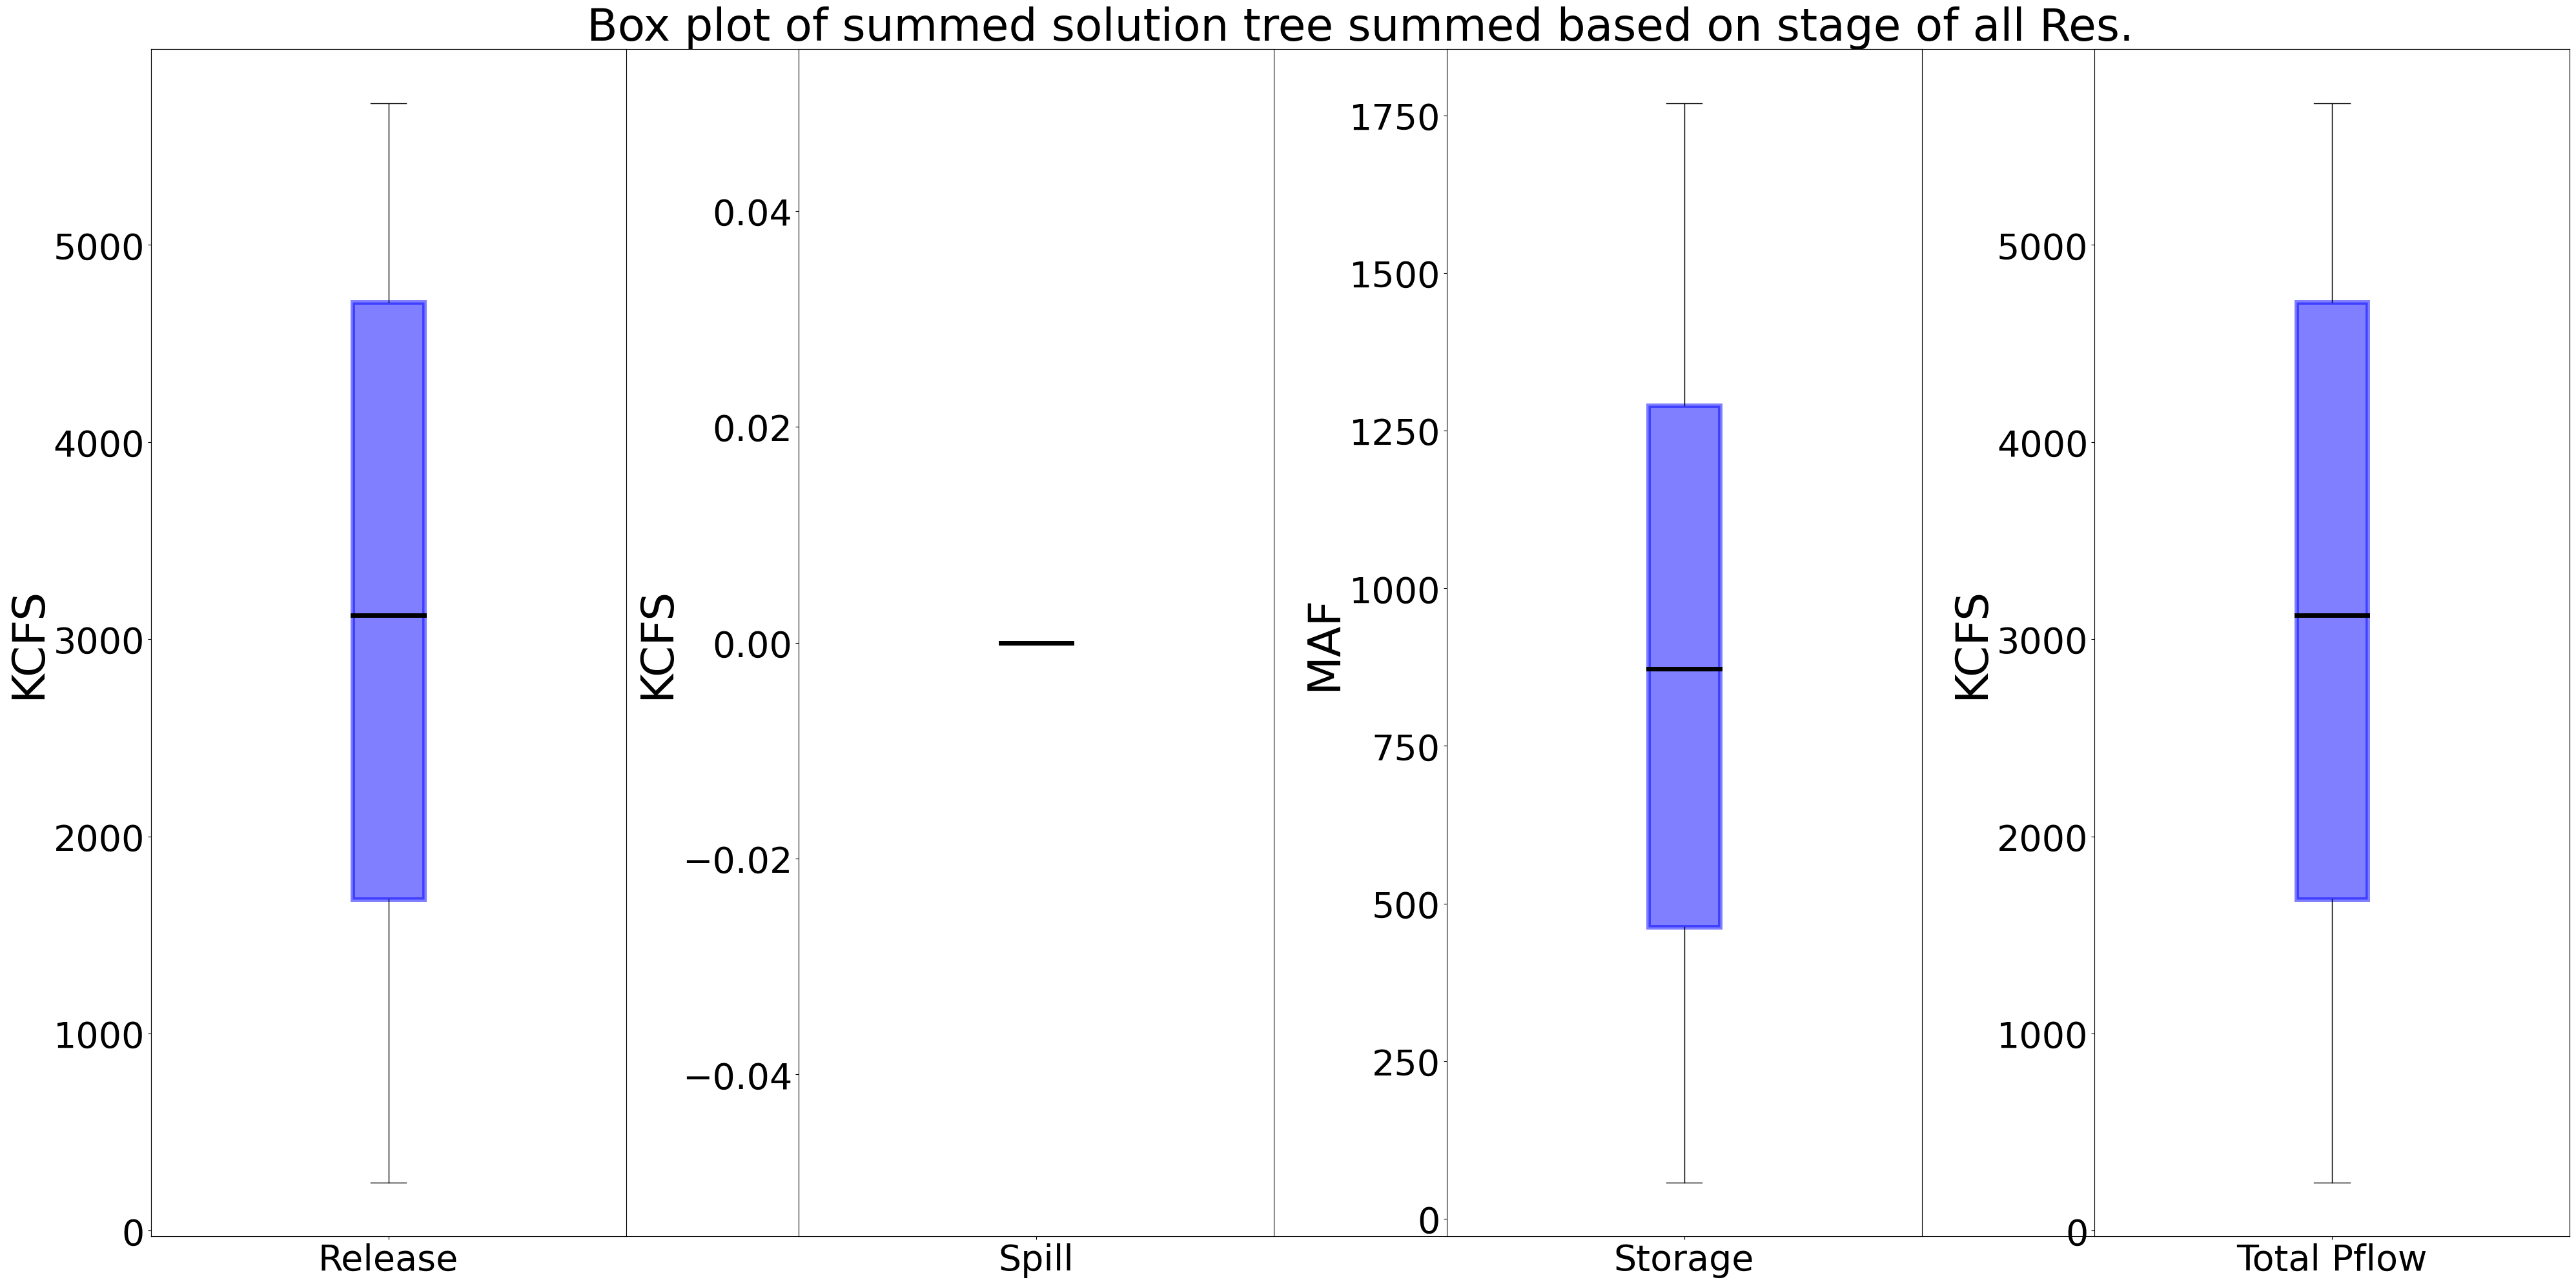

In [19]:
fig=plt.figure(figsize=(40,20))
plt.title("Box plot of summed solution tree summed based on stage of all Res.",fontsize=50)
plt.xticks([])
plt.yticks([])
for i in range(len(solution_tree)):
#     plt.subplot(1,4,i+1)
    ax=fig.add_subplot(1,4,i+1,label=var_dict[i][0])
    plt.boxplot(g_total[i].loc[:,'total'], patch_artist=True,
            boxprops=dict(facecolor='b', color='b',alpha=.5,linewidth=5),
            medianprops=dict(color='k',linewidth=5),
            )
    ax.set_xticklabels([var_dict[i][0]],fontsize=40)
    ax.tick_params(axis='both', which='major', labelsize=40)
    plt.ylabel(var_dict[i][1],fontsize=50)
    plt.tight_layout()
save_fig("box_stage_summed_summed",False)

In [20]:
plt.close('all')

In [21]:
temp=solution_tree[0]
temp

BB_out     FP_out     FR_out     GA_out  GP_out     OH_out  Node  \
0    78.941147  15.300000  37.647059  25.100000    36.0  51.822201     1   
1    50.205275  24.300000  33.190998  14.943089    36.0  50.205275     2   
2    53.322139  24.300000  35.900998  14.943089    36.0  53.322139     3   
3    43.053229  31.720890  32.400000  23.943089    36.0  43.053229     4   
4    37.897183  31.720890  33.360000  15.322066    36.0  54.600000     5   
..         ...        ...        ...        ...     ...        ...   ...   
311  25.379570  31.720890  28.235294  32.800000    36.0  45.939371   312   
312  27.501581  31.720890  35.580881  41.000000    36.0  27.501581   313   
313  14.876053  31.720890  33.350000  14.943089    36.0  14.876053   314   
314  54.600000  31.720890  30.480000  17.462059    36.0  54.600000   315   
315  54.600000  21.746575  26.506638  32.800000    36.0  54.600000   316   

     Parent      Prob  Stage  probability        ave       total  
0         0  1.000000      1         1.00  40.801734  244.810406  
1         1  0.680000      2         0.68  34.807439  208.844636  
2         1  0.320000      2         0.32  36.298061  217.788365  
3         2  0.647059      3         0.44  35.028406  210.170438  
4         2  0.352941      3         0.24  34.816690  208.900139  
..      ...       ...    ...          ...        ...         ...  
311     280  0.200000     21         0.02  33.345854  200.075125  
312     283  0.666667     21         0.04  33.217489  199.304934  
313     284  1.000000     21         0.02  24.294348  145.766086  
314     285  1.000000     21         0.02  37.477158  224.862949  
315     286  1.000000     21         0.02  37.708869  226.253213  

[316 rows x 13 columns]

In [22]:
g=temp.groupby('Stage')
total_qua=g['total'].quantile([0,.1,0.25,0.5,0.75,.9,1])
ave_qua=g['ave'].quantile([.1,0.25,0.5,.75,.9])

In [23]:
w=total_qua[20].to_numpy()
w

array([138.47543811, 166.31522808, 182.68809097, 199.07270703,
       210.33937814, 216.68559433, 242.27141841])

In [ ]:
n=n_stages
for j in range(len(solution_tree)):
    temp=solution_tree[j]
    g=temp.groupby('Stage')
    total_qua=g['total'].quantile([0,.1,0.25,0.5,0.75,.9,1])
    fig=plt.figure(figsize=(40,20))
    q_0,q_10,q_25,q_50,q_75,q_90,q_100=[],[],[],[],[],[],[]
    c1='#33d7ff'
    x=np.arange(n)
    x=x+1
    for i in range(n):
        w=total_qua[i+1].to_numpy()
        q_0.append(w[0])
        q_10.append(w[1])
        q_25.append(w[2])
        q_50.append(w[3])
        q_75.append(w[4])
        q_90.append(w[5])  
        q_100.append(w[0])
    ax=fig.add_subplot(111,label='1')
    ax.plot(x,q_50,c=c1,linewidth=5,label='Median')
    ax.fill_between(x,q_0,q_10,alpha=.1,color=c1)
    ax.fill_between(x,q_10,q_25,alpha=.3,color=c1)
    ax.fill_between(x,q_25,q_50,alpha=.5,color=c1)
    ax.fill_between(x,q_50,q_75,alpha=.5,color=c1)
    ax.fill_between(x,q_75,q_90,alpha=.3,color=c1)
    ax.fill_between(x,q_90,q_100,alpha=.1,color=c1)
    t=var_dict[j][0]+' Total'
    plt.title(t,fontsize=30)
    plt.xlabel(f'Stage ({n} day horizon)',fontsize=30)
    plt.ylabel(var_dict[j][1],fontsize=30)
    plt.grid(True,which='major',axis='both')
    plt.xticks(ticks=x)
    ax.tick_params(axis='both', which='major', labelsize=30)
    plt.xlim([1,n])
    plt.legend(fontsize=30)
    save_fig(f'quantile_{t}')

Saving figure quantile_Release Total
Saving figure quantile_Spill Total
Saving figure quantile_Storage Total
Saving figure quantile_Total Pflow Total


In [ ]:
n=n_stages
for j in range(len(solution_tree)):
    temp=solution_tree[j]
    g=temp.groupby('Stage')
    ave_qua=g['ave'].quantile([0,.1,0.25,0.5,0.75,.9,1])
    fig=plt.figure(figsize=(40,20))
    q_0,q_10,q_25,q_50,q_75,q_90,q_100=[],[],[],[],[],[],[]
    c1='#33d7ff'
    x=np.arange(n)
    x=x+1
    for i in range(n):
        w=ave_qua[i+1].to_numpy()
        q_0.append(w[0])
        q_10.append(w[1])
        q_25.append(w[2])
        q_50.append(w[3])
        q_75.append(w[4])
        q_90.append(w[5])  
        q_100.append(w[0])
    ax=fig.add_subplot(111,label='1')
    ax.plot(x,q_50,c=c1,linewidth=5,label='Median')
    ax.fill_between(x,q_0,q_10,alpha=.1,color=c1)
    ax.fill_between(x,q_10,q_25,alpha=.3,color=c1)
    ax.fill_between(x,q_25,q_50,alpha=.5,color=c1)
    ax.fill_between(x,q_50,q_75,alpha=.5,color=c1)
    ax.fill_between(x,q_75,q_90,alpha=.3,color=c1)
    ax.fill_between(x,q_90,q_100,alpha=.1,color=c1)
    t=var_dict[j][0]+' average'
    plt.title(t,fontsize=30)
    plt.xlabel(f'Stage ({n} day horizon)',fontsize=30)
    plt.ylabel(var_dict[j][1],fontsize=30)
    plt.grid(True,which='major',axis='both')
    plt.xticks(ticks=x)
    ax.tick_params(axis='both', which='major', labelsize=30)
    plt.xlim([1,n])
    plt.legend(fontsize=30)
    save_fig(f'quantile_{t}')

In [ ]:
plt.close('all')

In [ ]:
print('Code is Done!')